<a href="https://colab.research.google.com/github/SonakshiA/Is-It-A-Horse/blob/main/Is_It_A_Horse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import tensorflow as tf
from tensorflow.keras import models, layers, datasets

import tensorflow_datasets as tfds

**Downloading the images**

In [63]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [5]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


**Plotting 9 images from the training set along with the labels**

/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


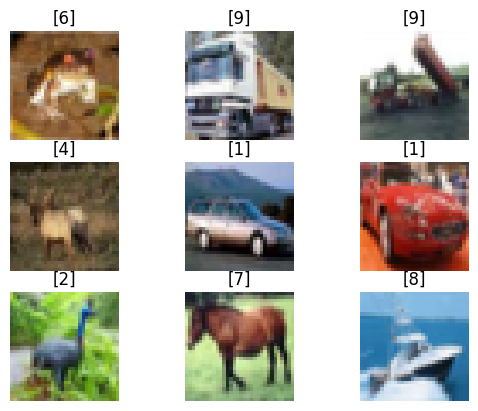

In [6]:
for i in range(9):
  ax = plt.subplot(3,3,i+1)
  plt.imshow(x_train[i])
  plt.title(y_train[i])
  plt.axis('off')

**Changing the labels**

In [10]:
HORSE_CLASS = 7
for i in range(50000):
  if y_train[i]!=HORSE_CLASS:
    y_train[i]=0

for i in range(10000):
  if y_test[i]!=HORSE_CLASS:
    y_test[i]=0

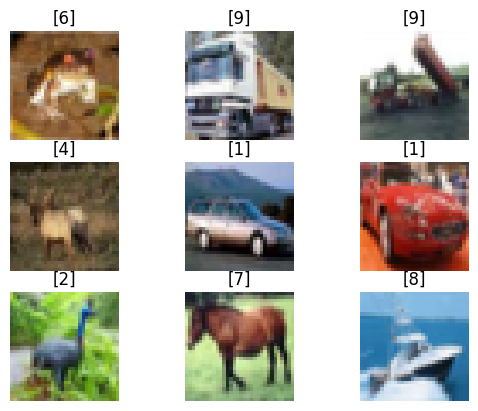

In [64]:
for i in range(9):
  ax = plt.subplot(3,3,i+1)
  plt.imshow(x_train[i])
  plt.title(y_train[i])
  plt.axis('off')

In [14]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train/=255.0
x_test/=255.0

In [15]:
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


**Neural Network Implementation**

In [47]:
model = models.Sequential()
model.add(layers.Conv2D(256,(4,4),activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Dropout(0.4))
model.add(layers.Conv2D(128,(3,3),activation='relu',kernel_regularizer = tf.keras.regularizers.l2()))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Dropout(0.4))
model.add(layers.Conv2D(128,(3,3),activation='relu',kernel_regularizer = tf.keras.regularizers.l2()))
model.add(layers.Flatten())
model.add(layers.Dense(128,activation='relu')) #Dense(128) is a fully connected layer
model.add(layers.Dense(2))

In [48]:
model.compile(optimizer=tf.keras.optimizers.Adam(),loss=tf.keras.losses.binary_crossentropy,metrics=['accuracy'])

In [50]:
model.fit(x_train,y_train,epochs=10,batch_size=16)

Epoch 1/10
3125/3125 [==============================] - 332s 106ms/step - loss: 7.6861 - accuracy: 0.9000
Epoch 2/10
3125/3125 [==============================] - 327s 105ms/step - loss: 7.6861 - accuracy: 0.9000
Epoch 3/10
3125/3125 [==============================] - 326s 104ms/step - loss: 7.6860 - accuracy: 0.9000
Epoch 4/10
3125/3125 [==============================] - 326s 104ms/step - loss: 7.6860 - accuracy: 0.9000
Epoch 5/10
3125/3125 [==============================] - 326s 104ms/step - loss: 7.6861 - accuracy: 0.9000
Epoch 6/10
3125/3125 [==============================] - 329s 105ms/step - loss: 7.6860 - accuracy: 0.9000
Epoch 7/10
3125/3125 [==============================] - 325s 104ms/step - loss: 7.6861 - accuracy: 0.9000
Epoch 8/10
3125/3125 [==============================] - 326s 104ms/step - loss: 7.6861 - accuracy: 0.9000
Epoch 9/10
3125/3125 [==============================] - 326s 104ms/step - loss: 7.6861 - accuracy: 0.9000
Epoch 10/10
3125/3125 [=======================

In [52]:
score = model.evaluate(x_test,y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 15s 49ms/step - loss: 7.6861 - accuracy: 0.9000
Test loss: 7.686120510101318
Test accuracy: 0.8999999761581421


**Predictions**

In [53]:
predictions = model.predict(x_test)

313/313 [==============================] - 18s 57ms/step


In [55]:
results = np.argmax(predictions,axis=1)
print(results)

[0 0 0 ... 0 0 0]


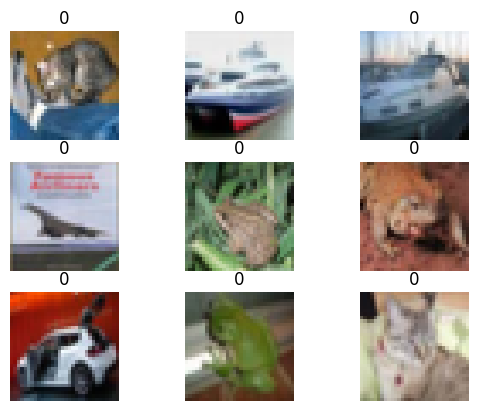

In [73]:
for i in range(9):
  ax = plt.subplot(3,3,i+1)
  plt.imshow(x_test[i])
  plt.title(results[i])
  plt.axis('off')